# Books Data

In [2]:
import pandas as pd

books_data = pd.read_csv("../data/raw/books_data.csv")

In [10]:
books_data.info(verbose=True, memory_usage=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [5]:
books_data.sample(3)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
148670,True to life: Real stories of changed hearts a...,NaN,['Janet L. Folger'],NaN,http://books.google.com/books?id=ckKAvAEACAAJ&...,NaN,2000,http://books.google.com/books?id=ckKAvAEACAAJ&...,['Abortion'],NaN
116740,Desert Heat,A cop lies dying beneath the blistering Arizon...,['J. A. Jance'],http://books.google.com/books/content?id=SijVl...,http://books.google.nl/books?id=SijVlwEACAAJ&d...,Harper,2009-06-30,http://books.google.nl/books?id=SijVlwEACAAJ&d...,['Fiction'],NaN
112757,The Lena Baker Story,"""This is the story of the first and only woman...",['Lela Bond Phillips'],http://books.google.com/books/content?id=NEUBA...,http://books.google.nl/books?id=NEUBAAAACAAJ&d...,Wings Pub Llc,2001,http://books.google.nl/books?id=NEUBAAAACAAJ&d...,['Biography & Autobiography'],NaN


In [6]:
books_data.head(3)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN


In [45]:
import seaborn as sns
sns.set_theme()

In [50]:
def generate_null_viz(df):
    null_percentages = (df.isna().sum() / df.shape[0] * 100).reset_index()
    null_percentages.columns = ["column", "null%"]
    ax = sns.barplot(
        data=null_percentages,
        y="column",
        x="null%",
    )
    ax.set(xlim=(0, 100))
    print(null_percentages)

          column      null%
0          Title   0.000471
1    description  32.222557
2        authors  14.789270
3          image  24.516958
4    previewLink  11.222011
5      publisher  35.727199
6  publishedDate  11.913617
7       infoLink  11.222011
8     categories  19.396527
9   ratingsCount  76.576712


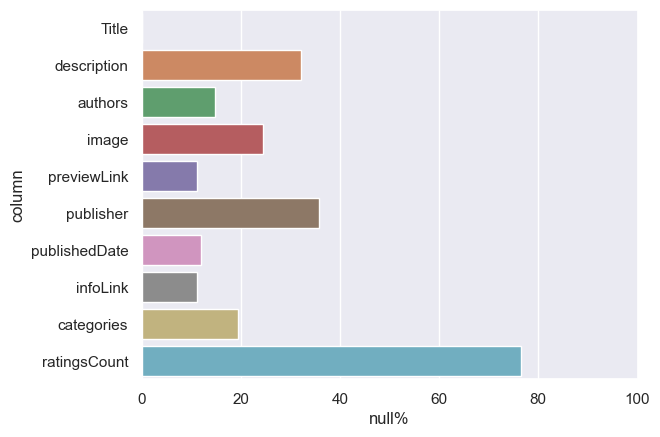

In [51]:
generate_null_viz(books_data)

## Title

Only one book without Title

In [18]:
books_data[books_data.Title.isna()]

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
1066,NaN,NaN,['Maharshi Ramana'],http://books.google.com/books/content?id=uq0uj...,http://books.google.nl/books?id=uq0ujwEACAAJ&d...,NaN,2015-12-15,http://books.google.nl/books?id=uq0ujwEACAAJ&d...,NaN,1.0


## Missing Descriptions

Description has 32% of missing values. This is column is very important because the project aims at building a hybrid recommender system and this field has the richest natural language data about an item. If we are going to judge a book by its cover, we should at least read the description.

          column       null%
0          Title    0.001461
1    description  100.000000
2        authors   42.672628
3          image   65.851378
4    previewLink   34.826568
5      publisher   83.425382
6  publishedDate   36.365097
7       infoLink   34.826568
8     categories   51.320826
9   ratingsCount   93.242453


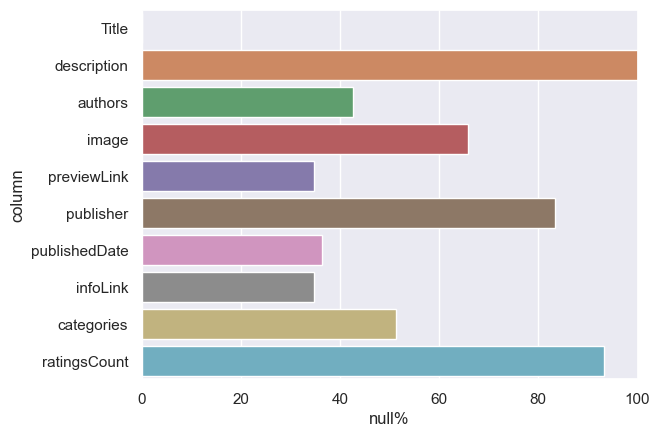

In [63]:
generate_null_viz(books_data[books_data.description.isna()])

34% out of those items with a missing description also lack a infoLink that could be used to webscrap a description in some way.

## Authors

In [77]:
import ast

author_count = books_data.authors.fillna("[]").apply(ast.literal_eval).explode().value_counts()

In [82]:
author_count.head(15)

authors
Rose Arny                                236
William Shakespeare                      228
Library of Congress. Copyright Office    178
Agatha Christie                          148
Erle Stanley Gardner                     128
Louis L'Amour                            125
Charles Dickens                          108
Isaac Asimov                              96
Mark Twain                                90
Edgar Rice Burroughs                      89
Rudyard Kipling                           86
Francine Pascal                           84
Various                                   78
Library of Congress                       77
Zane Grey                                 76
Name: count, dtype: int64

We find that a Power Law probably exists in regards to how many books an author has

<Axes: ylabel='authors'>

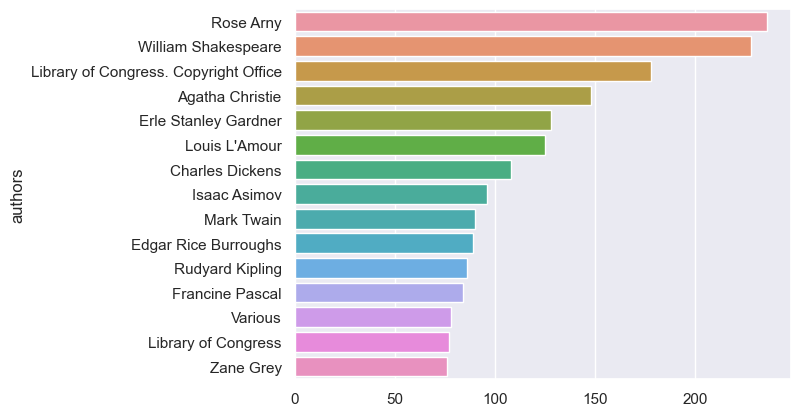

In [80]:
sns.barplot(
    x=author_count.head(15).values,
    y=author_count.head(15).index,
)

We can also notice that the authors with more publications are usually regarded as very popular. It makes sense, as a very popular author has a great chance of having their books published many times with different editions and publishers, even posthumously.

<Axes: >

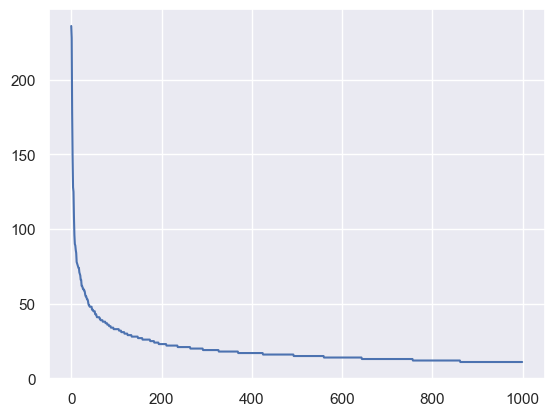

In [86]:
sns.lineplot(author_count.head(1000).values)

<Axes: xlabel='Book_Count', ylabel='Count'>

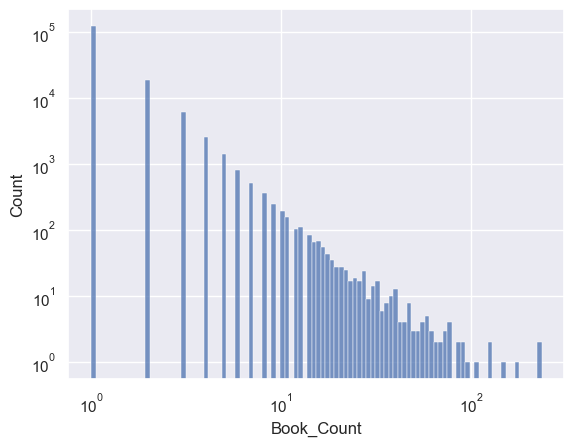

In [89]:
data = author_count.reset_index()
data.columns = ['Author', 'Book_Count']
sns.histplot(data['Book_Count'], bins=100, kde=False, log_scale=(True, True))

Although the log-log visualization strongly suggests that this in fact is a power law distribution, we would probably need to double check with a more precise method than just a visualization. If we can confirm the power law dynamics, in the case of adding the number of contributions as a feature in, let's say, a ranker, we would need to compensate for this power law. 

## PublishedDate

We notice non-standardized date formatting

In [94]:
books_data.publishedDate.sample(10)

209363           NaN
123613          1954
36084            NaN
8797      1986-05-01
81959     2014-09-09
66469            NaN
119076    1999-05-01
121442          1993
116311       2009-10
69299     2008-01-18
Name: publishedDate, dtype: object

We can even see special characters

In [138]:
books_data.publishedDate[books_data.publishedDate.str.contains("[^\\d-]").fillna(False)].sample(100).values

array(['2005*', '1991*', '1971*', '200?', '1992*', '2005*', '2001*',
       '1994*', '1960*', '1981*', '196?', '2005*', '198?', '1880*',
       '200?', '2020-08-17T23:42:12Z', '19??', '1925*', '1983*',
       '2021-11-09T17:01:00Z', '19??', '1993*', '1900*', '1975*', '1940*',
       '2021-11-05T11:09:00Z', '2016-10-12T00:00:00+02:00',
       '2017-03-26T04:39:04Z', '193?', '2021-11-05T20:28:00Z', '2002*',
       '1981*', '1995*', '1978*', '19??', '196?', '197?', '1970*',
       '1994*', '19??', '196?', '200?', '19??', '1991*', '2012*', '19??',
       '200?', '1984*', '1982*', '19??', '189?', '196?', '2005*',
       '2022-06-28T00:00:00+02:00', '1973*', '20??',
       '2022-06-22T22:59:00Z', '1944*', '2012-03-01T00:00:00+01:00',
       '19??', '1995*', '16??', '2022-05-12T00:00:00Z', '2005*',
       '2021-11-06T15:05:00Z', '1980*', '1966*', '189?', '1918*',
       '2013-01-02T00:00:00+01:00', '1991*', '2020-07-21T18:13:34Z',
       '193?', '19??', '198?', '1974*', '1980*', '1986*', '199

Fortunately, most of the dates can be inferred, even if some of them could be more challenging

In [146]:
books_data.publishedDate[~books_data.publishedDate.str.contains("[^\\d-]").fillna(False)].values[1552]

'2003-10'

In [141]:
pd.to_datetime(
    books_data.publishedDate[~books_data.publishedDate.str.contains("[^\\d-]").fillna(False)],
    format='mixed',
)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1672, at position 1552

# Reviews Data

In [11]:
reviews_data = pd.read_csv("../data/raw/Books_rating.csv")

In [12]:
reviews_data.info(verbose=True, memory_usage=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Id                  3000000 non-null  object 
 1   Title               2999792 non-null  object 
 2   Price               481171 non-null   float64
 3   User_id             2438213 non-null  object 
 4   profileName         2438095 non-null  object 
 5   review/helpfulness  3000000 non-null  object 
 6   review/score        3000000 non-null  float64
 7   review/time         3000000 non-null  int64  
 8   review/summary      2999593 non-null  object 
 9   review/text         2999992 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [13]:
reviews_data.sample(3)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1068168,3190072558,Lehr- und bungsbuch der deutschen Grammatik: N...,NaN,A2IN6ICQFZOE02,XIE CHENGZHE,0/0,4.0,1357516800,fine used book,"this book helps, the only thing is, as describ..."
1516616,B00087H3L4,"Five little Peppers and how they grew,",NaN,A2SH7OWE8QJYNC,Kaleidocherry,9/10,3.0,1206835200,"Charming, but too fast-paced","You know, the Five Little Peppers are always g..."
399650,1844560333,Pride and Prejudice,NaN,NaN,NaN,0/0,5.0,1010448000,Pride and Prejudice,"Pride and Prejudice was a good book, I really ..."
